<a href="https://colab.research.google.com/github/robgon-art/stable-diffusion-portraiture/blob/main/4_Beautiful_Paintings_SD_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from https://huggingface.co/stabilityai/stable-diffusion-3-medium

In [ ]:
# block 1
from diffusers import StableDiffusion3Img2ImgPipeline
from PIL import Image
import torch
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

# Load Stable Diffusion 3.0 Img2Img model
pipe = StableDiffusion3Img2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    torch_dtype=torch.bfloat16, hf_token=hf_token
).to("cuda")


In [ ]:
!wget https://raw.githubusercontent.com/robgon-art/stable-diffusion-portraiture/refs/heads/main/3%20sdxl%201.0.png

  0%|          | 0/30 [00:00<?, ?it/s]

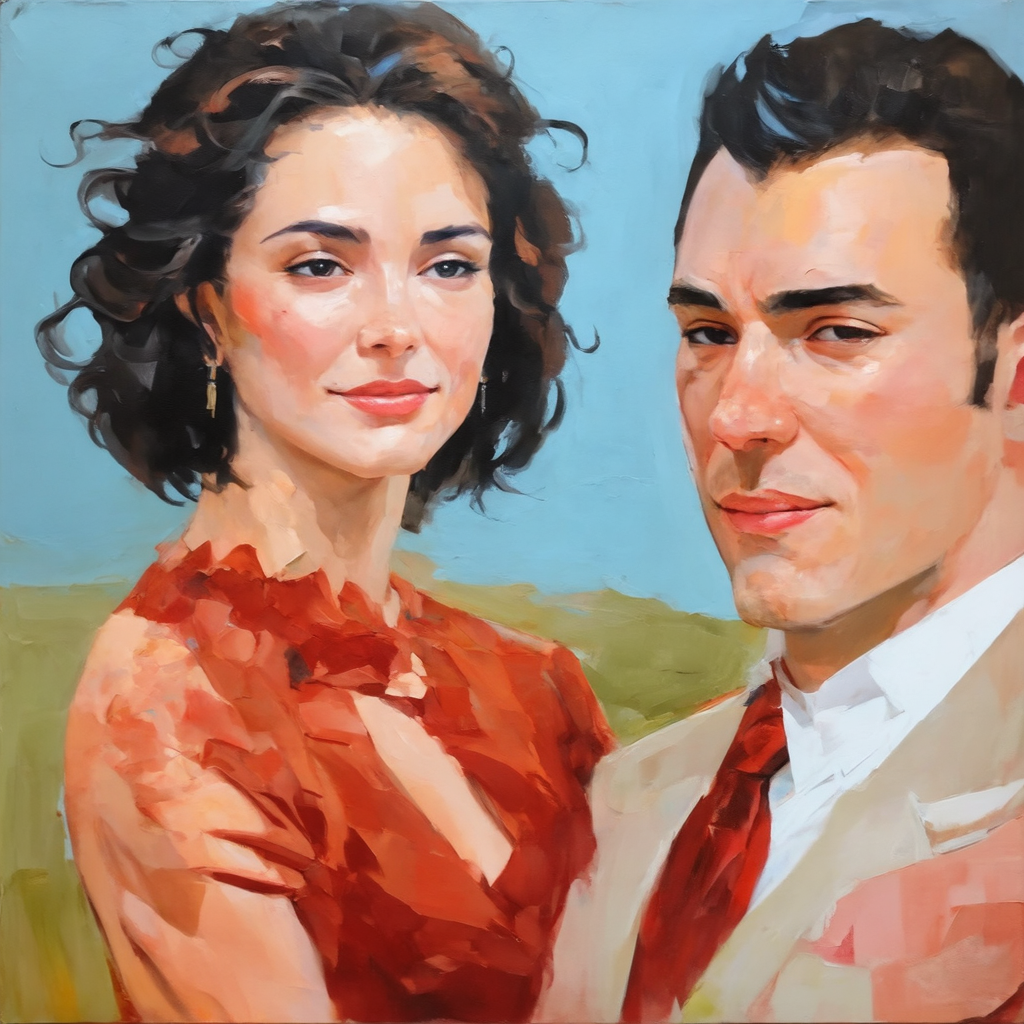

In [ ]:
# Load an input image
init_image = Image.open("3 sdxl 1.0.png").convert("RGB")
init_image = init_image.resize((1024, 1024))

# Set seed for reproducibility
torch.manual_seed(56)

# Generate a new image while keeping some structure
image = pipe(
    prompt="a beautiful painting of a man and a woman",
    image=init_image,
    strength=0.75,  # Controls how much the original image influences the output
    num_inference_steps=40,
    guidance_scale=4.5
).images[0]

image.save("4 sd 3.0.png")
image